In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [3]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [4]:
data = pd.read_csv('student_applications_data_n.csv', sep = ';')
df= data.copy()

In [5]:
df.head()

,Numer dokumentu,Data złożenia,Data zamknięcia,Student,Tryb studiów,Typ studiów,Język wykładowy,Kierunek,Status,Rodzaj wniosku,...,Liczba prac dyplomowych,Informacje o pracach dyplomowych,Stopień zaawansowania pracy,Słowo rodzin lub famil w uzasadnieniu,Słowo zdrow lub health w uzasadnieniu,Słowo bardzo proszę w uzasadnieniu,Słowo losow w uzasadnieniu,Słowo prac lub work w uzasadnieniu,Słowo obiecuję lub promise w uzasadnieniu,Słowo zobowiązuję w uzasadnieniu
0,565,13.10.2017 09:26,14.10.2017 08:56,WqAdrXQFVXEuVFbBNi8ZYw,D,I,PL,"Model 2,I,D,PL,7 - Inżynieria Komputerowa",Zamknięty - decyzja pozytywna,Wniosek ogólny,...,0,NaN,NaN,NIE,NIE,NIE,NIE,TAK,NIE,NIE
1,111,15.09.2017 17:02,19.09.2017 16:05,b7uHtLHmJCf40Cj27vMhVg,Z,I,PL,"Model 2,I,Z,PL,8 - Technika Wysokich Napięć i ...",Zamknięty - decyzja negatywna,Podanie o rejestrację,...,0,NaN,NaN,TAK,TAK,NIE,NIE,NIE,NIE,NIE
2,294,18.09.2017 22:57,19.09.2017 16:27,DjOIoCquSJwSIQ96XqbiQ,Z,I,PL,"Model 2,I,Z,PL,8 - Elektroenergetyka",Zamknięty - decyzja pozytywna,Podanie o rejestrację,...,0,NaN,NaN,NIE,NIE,NIE,NIE,NIE,NIE,NIE
3,13,14.09.2017 10:16,15.09.2017 13:38,cKN0GNsJejbI3uFXBTlw,D,I,PL,"Model 2,I,D,PL,7 - Elektromechatronika Pojazdó...",Zamknięty - decyzja pozytywna,Podanie o rejestrację,...,0,NaN,NaN,NIE,NIE,NIE,NIE,TAK,NIE,NIE
4,301,18.09.2017 23:29,19.09.2017 16:29,EJ0ALSHjEfgLOOCgPO0RjA,Z,I,PL,"Model 2,I,Z,PL,8 - Technika Wysokich Napięć i ...",Zamknięty - decyzja pozytywna,Podanie o rejestrację,...,0,NaN,NaN,NIE,NIE,NIE,NIE,NIE,NIE,NIE


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883 entries, 0 to 5882
Data columns (total 43 columns):
Numer dokumentu                              5883 non-null int64
Data złożenia                                5883 non-null object
Data zamknięcia                              5883 non-null object
Student                                      5883 non-null object
Tryb studiów                                 5883 non-null object
Typ studiów                                  5883 non-null object
Język wykładowy                              5883 non-null object
Kierunek                                     5883 non-null object
Status                                       5883 non-null object
Rodzaj wniosku                               5883 non-null object
Osoba przyjmująca                            5873 non-null object
Osoba przypisana                             5879 non-null object
Słowo regulamin w uzasadnieniu               5883 non-null object
Słowo formaln w uzasadnieniu        

In [7]:
df.describe()

,Numer dokumentu,Liczba załączników,Liczba zmian statusu,Semestr studiow,Brakujace ECTS,ECTS uznane w bieżącym semstrze,Suma zdobytych ECTS,Niezaliczone z sem 1,Niezaliczone z sem 2,Niezaliczone z sem 3,Niezaliczone z sem 4,Niezaliczone z sem 5,Niezaliczone z sem 6,Liczba brakujacych przedmiotow,Opłata za niezaliczone przedmioty,Liczba prac dyplomowych
count,5883.000000,5883.000000,5883.000000,5883.000000,5883.000000,5883.000000,5883.000000,5883.000000,5883.000000,5883.000000,5883.000000,5883.000000,5883.000000,5883.000000,5883.000000,5883.000000
mean,3194.697943,0.529152,4.803842,4.294238,25.784974,6.130036,98.748598,1.104369,1.095529,1.605133,1.523882,1.306986,1.010879,2.215366,383.422743,0.421894
std,1827.308481,0.719117,1.747959,2.162541,18.171830,15.418483,65.544222,2.217129,2.279154,2.689209,3.243946,3.162589,2.632200,3.358449,649.158947,0.671828
min,5.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1630.500000,0.000000,4.000000,3.000000,16.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3191.000000,0.000000,4.000000,4.000000,24.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,80.000000,0.000000
75%,4776.500000,1.000000,6.000000,6.000000,34.000000,4.000000,161.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,3.000000,520.000000,1.000000
max,6366.000000,18.000000,24.000000,9.000000,234.000000,181.000000,245.000000,16.000000,21.000000,20.000000,20.000000,16.000000,17.000000,37.000000,7940.000000,7.000000


In [8]:
df['Tryb studiów'].value_counts()

D    3605
Z    2278
Name: Tryb studiów, dtype: int64

In [9]:
df['Typ studiów'].value_counts()

I    4186
M    1694
P       2
J       1
Name: Typ studiów, dtype: int64

In [10]:
df.Status.value_counts()

Zamknięty - inne                                 2635
Zamknięty - decyzja pozytywna                    1930
Zamknięty - decyzja negatywna                     939
Zamknięty - odrzucony formalnie                   208
Anulowany - usunięty                              163
Złożony - oczekuje na przyjęcie w Dziekanacie       4
Oczekuje na decyzję Dziekana                        2
Rozpatrywany w dziekanacie                          1
Decyzja pozytywna - wymagany podpis studenta        1
Name: Status, dtype: int64

In [11]:
df['Rodzaj wniosku'].value_counts()

Potwierdzenie opłaty                                        2269
Wniosek ogólny                                              1877
Podanie o rejestrację                                        877
Wniosek o przedłużenie terminu złożenia pracy dyplomowej     337
Wniosek o zmniejszenie opłaty za powtarzanie                 322
Wniosek o rozłożenie opłaty za studia na raty                174
Podanie o urlop                                               27
Name: Rodzaj wniosku, dtype: int64

In [12]:
df['Złożone odwołanie'].value_counts()

NO     5662
YES     221
Name: Złożone odwołanie, dtype: int64

In [13]:
df['Semestr studiow'].value_counts()

3    1174
4     949
7     906
1     758
6     709
2     520
5     462
8     404
9       1
Name: Semestr studiow, dtype: int64

In [14]:
# Droping columns with too many NaN values
df.drop(['Stopień zaawansowania pracy', 
         'Informacje o pracach dyplomowych', 
         'Semestr rejestracji' , 
         'Brakujace przedmioty'], axis=1, inplace=True)

# Droping columns with data not connected with problem
df.drop(['Student', 
         'Osoba przyjmująca', 
         'Osoba przypisana', 
         'Numer dokumentu', 
         'Data złożenia', 
         'Data zamknięcia',
         'Liczba prac dyplomowych',
         'Język wykładowy',
         'Kierunek',
         'Semestr aktualny'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883 entries, 0 to 5882
Data columns (total 29 columns):
Tryb studiów                                 5883 non-null object
Typ studiów                                  5883 non-null object
Status                                       5883 non-null object
Rodzaj wniosku                               5883 non-null object
Słowo regulamin w uzasadnieniu               5883 non-null object
Słowo formaln w uzasadnieniu                 5883 non-null object
Słowo postęp w uzasadnieniu                  5883 non-null object
Złożone odwołanie                            5883 non-null object
Liczba załączników                           5883 non-null int64
Liczba zmian statusu                         5883 non-null int64
Semestr studiow                              5883 non-null int64
Brakujace ECTS                               5883 non-null int64
ECTS uznane w bieżącym semstrze              5883 non-null int64
Suma zdobytych ECTS                     

In [16]:
# Droping columns with single words
'''df.drop(['Słowo regulamin w uzasadnieniu',
        'Słowo formaln w uzasadnieniu',
        'Słowo postęp w uzasadnieniu',
        'Słowo rodzin lub famil w uzasadnieniu',
        'Słowo zdrow lub health w uzasadnieniu',
        'Słowo bardzo proszę w uzasadnieniu',
        'Słowo losow w uzasadnieniu',
        'Słowo prac lub work w uzasadnieniu',
        'Słowo obiecuję lub promise w uzasadnieniu',
        'Słowo zobowiązuję w uzasadnieniu'], axis=1, inplace=True)'''

"df.drop(['Słowo regulamin w uzasadnieniu',\n        'Słowo formaln w uzasadnieniu',\n        'Słowo postęp w uzasadnieniu',\n        'Słowo rodzin lub famil w uzasadnieniu',\n        'Słowo zdrow lub health w uzasadnieniu',\n        'Słowo bardzo proszę w uzasadnieniu',\n        'Słowo losow w uzasadnieniu',\n        'Słowo prac lub work w uzasadnieniu',\n        'Słowo obiecuję lub promise w uzasadnieniu',\n        'Słowo zobowiązuję w uzasadnieniu'], axis=1, inplace=True)"

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883 entries, 0 to 5882
Data columns (total 29 columns):
Tryb studiów                                 5883 non-null object
Typ studiów                                  5883 non-null object
Status                                       5883 non-null object
Rodzaj wniosku                               5883 non-null object
Słowo regulamin w uzasadnieniu               5883 non-null object
Słowo formaln w uzasadnieniu                 5883 non-null object
Słowo postęp w uzasadnieniu                  5883 non-null object
Złożone odwołanie                            5883 non-null object
Liczba załączników                           5883 non-null int64
Liczba zmian statusu                         5883 non-null int64
Semestr studiow                              5883 non-null int64
Brakujace ECTS                               5883 non-null int64
ECTS uznane w bieżącym semstrze              5883 non-null int64
Suma zdobytych ECTS                     

### Changing Status columns into numerical values (1 - Positive , 0 - Negative)

In [18]:
df['Status'].unique()

array(['Zamknięty - decyzja pozytywna', 'Zamknięty - decyzja negatywna',
       'Zamknięty - inne', 'Anulowany - usunięty',
       'Zamknięty - odrzucony formalnie', 'Rozpatrywany w dziekanacie',
       'Złożony - oczekuje na przyjęcie w Dziekanacie',
       'Decyzja pozytywna - wymagany podpis studenta',
       'Oczekuje na decyzję Dziekana'], dtype=object)

In [19]:
wrong_status_list = df[df['Status'].isin(['Anulowany - usunięty', 
                      'Rozpatrywany w dziekanacie', 
                      'Oczekuje na decyzję Dziekana', 
                      'Złożony - oczekuje na przyjęcie w Dziekanacie',
                      'Zamknięty - inne'])].index


# Drop rows with wrong Status value
df.drop(index=wrong_status_list, inplace=True)


# Replace Status values - Positive - 1
df.replace(to_replace=['Zamknięty - decyzja pozytywna', 'Decyzja pozytywna - wymagany podpis studenta'],
          value=1, inplace=True)
# Replace Status values - Negarive  - 0
df.replace(to_replace=['Zamknięty - decyzja negatywna', 'Zamknięty - odrzucony formalnie'],
          value=0, inplace=True)

### Changing Tryb studiów into numerical values (0 - Zaoczne, 1- Dzienne)

In [20]:
# Replace Tryb studiów values - D - 1
df.replace(to_replace=['D'],
          value=1, inplace=True)
# Replace Tryb studiów values - Z  - 0
df.replace(to_replace=['Z'],
          value=0, inplace=True)

In [21]:
df['Tryb studiów'].unique()

array([1, 0], dtype=int64)

### Changing Tryb studiów into numerical values (0 - Inz, 1- Mgr)

In [22]:
# Droping Typ studiów - P - just 1 observation
df.drop(index=df[df['Typ studiów'].isin(['P'])].index , inplace=True)

In [23]:
# Replace Tryb studiów values - I - 1
df.replace(to_replace=['I'], value=1, inplace=True)

# Replace Tryb studiów values - M  - 0
df.replace(to_replace=['M'], value=0, inplace=True)

In [24]:
df['Tryb studiów'].unique()

array([1, 0], dtype=int64)

### Changing  into numerical values (0 - No, 1- Yes)

In [25]:
# Replace values - Yes - 1
df.replace(to_replace=['YES', 'Yes', 'TAK', 'Tak'], value=1, inplace=True)
# Replace values - No  - 0
df.replace(to_replace=['NO', 'No', 'NIE', 'Nie'], value=0, inplace=True)

In [26]:
df['Złożone odwołanie'].unique()

array([0, 1], dtype=int64)

### Changing categorical values to dummies

In [27]:
df = pd.get_dummies(df)

### Dataframe after cleaning, tranformations

In [28]:
df.head()

,Tryb studiów,Typ studiów,Status,Słowo regulamin w uzasadnieniu,Słowo formaln w uzasadnieniu,Słowo postęp w uzasadnieniu,Złożone odwołanie,Liczba załączników,Liczba zmian statusu,Semestr studiow,...,Słowo prac lub work w uzasadnieniu,Słowo obiecuję lub promise w uzasadnieniu,Słowo zobowiązuję w uzasadnieniu,Rodzaj wniosku_Podanie o rejestrację,Rodzaj wniosku_Podanie o urlop,Rodzaj wniosku_Potwierdzenie opłaty,Rodzaj wniosku_Wniosek o przedłużenie terminu złożenia pracy dyplomowej,Rodzaj wniosku_Wniosek o rozłożenie opłaty za studia na raty,Rodzaj wniosku_Wniosek o zmniejszenie opłaty za powtarzanie,Rodzaj wniosku_Wniosek ogólny
0,1,1,1,0,0,0,0,0,6,7,...,1,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,6,6,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,4,4,...,0,0,0,1,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,12,6,...,1,0,0,1,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,4,6,...,0,0,0,1,0,0,0,0,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3077 entries, 0 to 5876
Data columns (total 35 columns):
Tryb studiów                                                               3077 non-null int64
Typ studiów                                                                3077 non-null int64
Status                                                                     3077 non-null int64
Słowo regulamin w uzasadnieniu                                             3077 non-null int64
Słowo formaln w uzasadnieniu                                               3077 non-null int64
Słowo postęp w uzasadnieniu                                                3077 non-null int64
Złożone odwołanie                                                          3077 non-null int64
Liczba załączników                                                         3077 non-null int64
Liczba zmian statusu                                                       3077 non-null int64
Semestr studiow                       

In [81]:
df.corr()< -0.8

# There is no strong correlation between status and other features

,Tryb studiów,Typ studiów,Status,Słowo regulamin w uzasadnieniu,Słowo formaln w uzasadnieniu,Słowo postęp w uzasadnieniu,Złożone odwołanie,Liczba załączników,Liczba zmian statusu,Semestr studiow,...,Słowo prac lub work w uzasadnieniu,Słowo obiecuję lub promise w uzasadnieniu,Słowo zobowiązuję w uzasadnieniu,Rodzaj wniosku_Podanie o rejestrację,Rodzaj wniosku_Podanie o urlop,Rodzaj wniosku_Potwierdzenie opłaty,Rodzaj wniosku_Wniosek o przedłużenie terminu złożenia pracy dyplomowej,Rodzaj wniosku_Wniosek o rozłożenie opłaty za studia na raty,Rodzaj wniosku_Wniosek o zmniejszenie opłaty za powtarzanie,Rodzaj wniosku_Wniosek ogólny
Tryb studiów,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Typ studiów,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Status,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Słowo regulamin w uzasadnieniu,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Słowo formaln w uzasadnieniu,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Słowo postęp w uzasadnieniu,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Złożone odwołanie,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Liczba załączników,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Liczba zmian statusu,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Semestr studiow,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
df.corr().Status

Tryb studiów                                                               0.087703
Typ studiów                                                               -0.014470
Status                                                                     1.000000
Słowo regulamin w uzasadnieniu                                             0.200965
Słowo formaln w uzasadnieniu                                              -0.046800
Słowo postęp w uzasadnieniu                                               -0.078633
Złożone odwołanie                                                         -0.069747
Liczba załączników                                                         0.021884
Liczba zmian statusu                                                       0.198696
Semestr studiow                                                            0.053499
Brakujace ECTS                                                            -0.009965
ECTS uznane w bieżącym semstrze                                            0

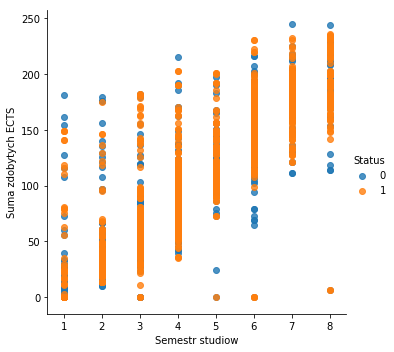

In [79]:
sns.lmplot(x='Semestr studiow', y='Suma zdobytych ECTS', data=df, hue='Status', fit_reg=False)

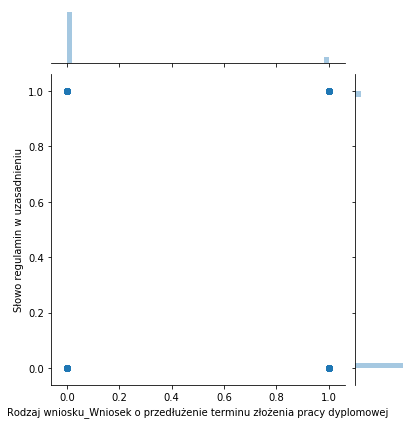

In [75]:
sns.jointplot(x='Rodzaj wniosku_Wniosek o przedłużenie terminu złożenia pracy dyplomowej', y='Słowo regulamin w uzasadnieniu', data=df)

In [31]:
# sns.pairplot(df, hue='Status')
# plt.show()

(array([1147.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1930.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

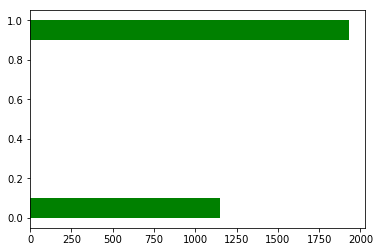

In [32]:
plt.hist(df['Status'], orientation='horizontal', color='Green')

### Train test split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Status', axis=1), df['Status'], test_size=0.2, random_state= 123 )

### Logistic Regresion 

In [34]:
pp = Pipeline([
    ('scale', StandardScaler()),
    ('clf', LogisticRegression())])

pp_param_grid_lr = {'clf__C': [0.001, 0.01, 0.1, 1],
                   'clf__penalty': ['l1', 'l2']}

grid_lr = GridSearchCV(pp, param_grid=pp_param_grid_lr, cv=3, n_jobs=-1, refit=True)
grid_lr.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__C': [0.001, 0.01, 0.1, 1], 'clf__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
print(accuracy_score(y_train, grid_lr.predict(X_train)))
print(confusion_matrix(y_train, grid_lr.predict(X_train)))
print(classification_report(y_train, grid_lr.predict(X_train)))

0.7192198293376676
[[ 485  428]
 [ 263 1285]]
              precision    recall  f1-score   support

           0       0.65      0.53      0.58       913
           1       0.75      0.83      0.79      1548

   micro avg       0.72      0.72      0.72      2461
   macro avg       0.70      0.68      0.69      2461
weighted avg       0.71      0.72      0.71      2461



In [36]:
print(accuracy_score(y_test, grid_lr.predict(X_test)))
print(confusion_matrix(y_test, grid_lr.predict(X_test)))
print(classification_report(y_test, grid_lr.predict(X_test)))

0.702922077922078
[[125 109]
 [ 74 308]]
              precision    recall  f1-score   support

           0       0.63      0.53      0.58       234
           1       0.74      0.81      0.77       382

   micro avg       0.70      0.70      0.70       616
   macro avg       0.68      0.67      0.67       616
weighted avg       0.70      0.70      0.70       616



### SVM

In [37]:
pp = Pipeline([
    ('scale', StandardScaler()),
    ('clf', SVC())])

pp_param_grid_svm = {'clf__C': [0.001, 0.01, 0.1, 1],
                   'clf__kernel': ['poly', 'rbf'],
                   'clf__degree': [2,3],
                    'clf__gamma': ['auto', 'scale']}

grid_svm = GridSearchCV(pp, param_grid=pp_param_grid_svm, cv=3, n_jobs=-1, refit=True)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__C': [0.001, 0.01, 0.1, 1], 'clf__kernel': ['poly', 'rbf'], 'clf__degree': [2, 3], 'clf__gamma': ['auto', 'scale']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
print(accuracy_score(y_train, grid_svm.predict(X_train)))
print(confusion_matrix(y_train, grid_svm.predict(X_train)))
print(classification_report(y_train, grid_svm.predict(X_train)))

0.8049573344169036
[[ 656  257]
 [ 223 1325]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       913
           1       0.84      0.86      0.85      1548

   micro avg       0.80      0.80      0.80      2461
   macro avg       0.79      0.79      0.79      2461
weighted avg       0.80      0.80      0.80      2461



In [39]:
print(accuracy_score(y_test, grid_svm.predict(X_test)))
print(confusion_matrix(y_test, grid_svm.predict(X_test)))
print(classification_report(y_test, grid_svm.predict(X_test)))

0.7386363636363636
[[152  82]
 [ 79 303]]
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       234
           1       0.79      0.79      0.79       382

   micro avg       0.74      0.74      0.74       616
   macro avg       0.72      0.72      0.72       616
weighted avg       0.74      0.74      0.74       616



### Naive Bayes 

In [40]:
pp = Pipeline([
    ('scale', StandardScaler()),
    ('clf', GaussianNB())])

pp_param_grid_nb = {}

grid_nb = GridSearchCV(pp, param_grid=pp_param_grid_nb, cv=3, n_jobs=-1, verbose=2)
grid_nb.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None, var_smoothing=1e-09))]),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [41]:
print(accuracy_score(y_train, grid_nb.predict(X_train)))
print(confusion_matrix(y_train, grid_nb.predict(X_train)))
print(classification_report(y_train, grid_nb.predict(X_train)))

0.6407964242177976
[[  88  825]
 [  59 1489]]
              precision    recall  f1-score   support

           0       0.60      0.10      0.17       913
           1       0.64      0.96      0.77      1548

   micro avg       0.64      0.64      0.64      2461
   macro avg       0.62      0.53      0.47      2461
weighted avg       0.63      0.64      0.55      2461



In [42]:
print(accuracy_score(y_test, grid_nb.predict(X_test)))
print(confusion_matrix(y_test, grid_nb.predict(X_test)))
print(classification_report(y_test, grid_nb.predict(X_test)))

0.6331168831168831
[[ 19 215]
 [ 11 371]]
              precision    recall  f1-score   support

           0       0.63      0.08      0.14       234
           1       0.63      0.97      0.77       382

   micro avg       0.63      0.63      0.63       616
   macro avg       0.63      0.53      0.46       616
weighted avg       0.63      0.63      0.53       616



### KNN 

In [43]:
pp = Pipeline([
    ('scale', StandardScaler()),
    ('clf', KNeighborsClassifier())])

pp_param_grid_knn = {'clf__n_neighbors' : np.linspace(3,15,13).astype(int)}

grid_knn = GridSearchCV(pp, param_grid=pp_param_grid_knn, cv=3, n_jobs=-1, verbose=2, refit=True)
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 13 candidates, totalling 39 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  39 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [44]:
print(accuracy_score(y_train, grid_knn.predict(X_train)))
print(confusion_matrix(y_train, grid_knn.predict(X_train)))
print(classification_report(y_train, grid_knn.predict(X_train)))

0.8423405119869971
[[ 676  237]
 [ 151 1397]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       913
           1       0.85      0.90      0.88      1548

   micro avg       0.84      0.84      0.84      2461
   macro avg       0.84      0.82      0.83      2461
weighted avg       0.84      0.84      0.84      2461



In [45]:
print(accuracy_score(y_test, grid_knn.predict(X_test)))
print(confusion_matrix(y_test, grid_knn.predict(X_test)))
print(classification_report(y_test, grid_knn.predict(X_test)))

0.698051948051948
[[125 109]
 [ 77 305]]
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       234
           1       0.74      0.80      0.77       382

   micro avg       0.70      0.70      0.70       616
   macro avg       0.68      0.67      0.67       616
weighted avg       0.69      0.70      0.69       616



### Random Forest Classifier

In [46]:
pp = Pipeline([
    ('scale', StandardScaler()),
    ('clf', RandomForestClassifier())])

pp_param_grid_rf = {
    'clf__max_depth': [80, 90, 100, 110],
    'clf__max_features': [10,15],
    'clf__min_samples_leaf': [3, 4, 5],
    'clf__min_samples_split': [8, 10, 12],
    'clf__n_estimators': [100, 200, 300, 1000]
}

grid_rf = GridSearchCV(pp, param_grid=pp_param_grid_rf, cv=3, n_jobs=-1, verbose=2, refit=True)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
      ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__max_depth': [80, 90, 100, 110], 'clf__max_features': [10, 15], 'clf__min_samples_leaf': [3, 4, 5], 'clf__min_samples_split': [8, 10, 12], 'clf__n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [47]:
print(accuracy_score(y_train, grid_rf.predict(X_train)))
print(confusion_matrix(y_train, grid_rf.predict(X_train)))
print(classification_report(y_train, grid_rf.predict(X_train)))

0.929703372612759
[[ 807  106]
 [  67 1481]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       913
           1       0.93      0.96      0.94      1548

   micro avg       0.93      0.93      0.93      2461
   macro avg       0.93      0.92      0.92      2461
weighted avg       0.93      0.93      0.93      2461



In [48]:
print(accuracy_score(y_test, grid_rf.predict(X_test)))
print(confusion_matrix(y_test, grid_rf.predict(X_test)))
print(classification_report(y_test, grid_rf.predict(X_test)))

0.762987012987013
[[174  60]
 [ 86 296]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       234
           1       0.83      0.77      0.80       382

   micro avg       0.76      0.76      0.76       616
   macro avg       0.75      0.76      0.75       616
weighted avg       0.77      0.76      0.77       616



### Time efficiency

In [ ]:
%%timeit -n 10
grid_lr.best_estimator_.steps[1][1].fit(X_train, y_train)

In [ ]:
%%timeit -n 10
grid_svm.best_estimator_.steps[1][1].fit(X_train, y_train)

In [ ]:
%%timeit -n 10
grid_nb.best_estimator_.steps[1][1].fit(X_train, y_train)

In [ ]:
%%timeit -n 10
grid_knn.best_estimator_.steps[1][1].fit(X_train, y_train)

In [ ]:
%%timeit -n 10
grid_rf.best_estimator_.steps[1][1].fit(X_train, y_train)

In [49]:
time_columns = ['Algorithm','LR', 'SVM', 'NB' ,'KNN', 'RF']
time_mean = ['Time mean (ms)', 64.1, 502, 1.94, 2.92, 752]
time_std = ['Time std (ms)', 3.24, 2.69, 0.52, 0.218, 5.25]

pd.DataFrame(np.vstack([time_mean, time_std]), columns=time_columns )

,Algorithm,LR,SVM,NB,KNN,RF
0,Time mean (ms),64.1,502,1.94,2.92,752
1,Time std (ms),3.24,2.69,0.52,0.218,5.25


### Dataframe splited - each dataframe has just one kind of applyment type

In [ ]:
df.columns

In [50]:
df_podanie_o_rejestracje = df[df['Rodzaj wniosku_Podanie o rejestrację']==1]
df_podanie_urlop = df[df['Rodzaj wniosku_Podanie o urlop']==1]
df_podanie_potwierdznie_oplaty = df[df['Rodzaj wniosku_Potwierdzenie opłaty']==1]
df_podanie_przedluzenie_terminu_pracy = df[df['Rodzaj wniosku_Wniosek o przedłużenie terminu złożenia pracy dyplomowej']==1]
df_podanie_raty = df[df['Rodzaj wniosku_Wniosek o rozłożenie opłaty za studia na raty']==1]
df_podanie_zmniejszenie_oplaty = df[df['Rodzaj wniosku_Wniosek o zmniejszenie opłaty za powtarzanie']==1]
df_podanie_ogolny = df[df['Rodzaj wniosku_Wniosek ogólny']==1]

In [51]:
dataframes_list = [df_podanie_o_rejestracje, df_podanie_ogolny, df_podanie_potwierdznie_oplaty, df_podanie_przedluzenie_terminu_pracy, df_podanie_raty, df_podanie_urlop, df_podanie_zmniejszenie_oplaty]

In [52]:
dataframes_list_str = ['df_podanie_o_rejestracje', 'df_podanie_ogolny', 'df_podanie_potwierdznie_oplaty', 'df_podanie_przedluzenie_terminu_pracy', 'df_podanie_raty', 'df_podanie_urlop', 'df_podanie_zmniejszenie_oplaty']

### SVM - for all data together works well

In [ ]:
pp = Pipeline([
    ('scale', StandardScaler()),
    ('clf', SVC())])

pp_param_grid_svm = {'clf__C': [0.001, 0.01, 0.1, 1],
                   'clf__kernel': ['poly', 'rbf'],
                   'clf__degree': [2,3],
                    'clf__gamma': ['auto', 'scale']}

In [ ]:
def train_svm_data_list(data_list):
    best_models_list = []
    for counter, data in enumerate(data_list):
        X_train, X_test, y_train, y_test = train_test_split(data.drop('Status', axis=1), data['Status'], test_size=0.2, random_state= 123 )
        grid_svm = GridSearchCV(pp, param_grid=pp_param_grid_svm, cv=3, n_jobs=-1, refit=True, verbose=0)
        grid_svm.fit(X_train, y_train)
        best_models_list.append(grid_svm)
        
        print(dataframes_list_str[counter] , ' - train dataset')
        print('')
        print(accuracy_score(y_train, grid_svm.predict(X_train)))
        print(confusion_matrix(y_train, grid_svm.predict(X_train)))
        print(classification_report(y_train, grid_svm.predict(X_train)))
        
        print(dataframes_list_str[counter] , ' - test dataset')
        print('')
        print(accuracy_score(y_test, grid_svm.predict(X_test)))
        print(confusion_matrix(y_test, grid_svm.predict(X_test)))
        print(classification_report(y_test, grid_svm.predict(X_test)))
    return best_models_list

In [ ]:
train_svm_data_list(dataframes_list)

### Random forest 

In [ ]:
pp = Pipeline([
    ('scale', StandardScaler()),
    ('clf', RandomForestClassifier())])

pp_param_grid_rf = {
    'clf__max_depth': [80, 90, 100, 110],
    'clf__max_features': [10,15],
    'clf__min_samples_leaf': [3, 4, 5],
    'clf__min_samples_split': [8, 10, 12],
    'clf__n_estimators': [100, 200, 300, 1000]
}

In [ ]:
def train_rf_data_list(data_list):
    best_models_list = []
    for counter, data in enumerate(data_list):
        X_train, X_test, y_train, y_test = train_test_split(data.drop('Status', axis=1), data['Status'], test_size=0.2, random_state= 123 )
        grid_rf = GridSearchCV(pp, param_grid=pp_param_grid_rf, cv=3, n_jobs=-1, verbose=2, refit=True)
        grid_rf.fit(X_train, y_train)
        best_models_list.append(grid_rf)
        
        print(dataframes_list_str[counter] , ' - train dataset')
        print('')
        print(accuracy_score(y_train, grid_rf.predict(X_train)))
        print(confusion_matrix(y_train, grid_rf.predict(X_train)))
        print(classification_report(y_train, grid_rf.predict(X_train)))
        
        print(dataframes_list_str[counter] , ' - test dataset')
        print('')
        print(accuracy_score(y_test, grid_rf.predict(X_test)))
        print(confusion_matrix(y_test, grid_rf.predict(X_test)))
        print(classification_report(y_test, grid_rf.predict(X_test)))
    return best_models_list

In [ ]:
train_rf_data_list(dataframes_list)

In [53]:
dataframes_list = [df_podanie_o_rejestracje, df_podanie_ogolny, df_podanie_potwierdznie_oplaty, df_podanie_przedluzenie_terminu_pracy, df_podanie_raty, df_podanie_urlop, df_podanie_zmniejszenie_oplaty]

,Tryb studiów,Typ studiów,Status,Słowo regulamin w uzasadnieniu,Słowo formaln w uzasadnieniu,Słowo postęp w uzasadnieniu,Złożone odwołanie,Liczba załączników,Liczba zmian statusu,Semestr studiow,...,Słowo prac lub work w uzasadnieniu,Słowo obiecuję lub promise w uzasadnieniu,Słowo zobowiązuję w uzasadnieniu,Rodzaj wniosku_Podanie o rejestrację,Rodzaj wniosku_Podanie o urlop,Rodzaj wniosku_Potwierdzenie opłaty,Rodzaj wniosku_Wniosek o przedłużenie terminu złożenia pracy dyplomowej,Rodzaj wniosku_Wniosek o rozłożenie opłaty za studia na raty,Rodzaj wniosku_Wniosek o zmniejszenie opłaty za powtarzanie,Rodzaj wniosku_Wniosek ogólny
1,0,1,0,0,0,1,0,0,6,6,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,4,4,...,0,0,0,1,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,12,6,...,1,0,0,1,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,4,6,...,0,0,0,1,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,6,6,...,0,0,0,1,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,6,4,...,1,0,0,1,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,6,6,...,1,0,0,1,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,6,6,...,0,0,0,1,0,0,0,0,0,0
13,1,1,1,0,0,0,0,0,6,6,...,1,0,0,1,0,0,0,0,0,0
14,1,1,1,0,0,0,0,0,6,6,...,1,0,0,1,0,0,0,0,0,0


In [56]:
df_podanie_o_rejestracje.Status.value_counts()

1    494
0    359
Name: Status, dtype: int64

In [57]:
df_podanie_ogolny.Status.value_counts()

1    773
0    585
Name: Status, dtype: int64

In [58]:
df_podanie_potwierdznie_oplaty.Status.value_counts()

1    53
0     2
Name: Status, dtype: int64

In [59]:
df_podanie_przedluzenie_terminu_pracy.Status.value_counts()

1    279
0     48
Name: Status, dtype: int64

In [60]:
df_podanie_raty.Status.value_counts()

1    88
0    83
Name: Status, dtype: int64

In [62]:
df_podanie_urlop.Status.value_counts()

0    16
1     9
Name: Status, dtype: int64

In [64]:
df_podanie_zmniejszenie_oplaty.Status.value_counts()

1    234
0     54
Name: Status, dtype: int64